In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Leitura da base de dados original

In [2]:
path_enem = 'Bases\MICRODADOS_ENEM_2023.csv'

In [3]:
# df_enem = pd.read_csv(path_enem, sep=';', encoding='latin1', low_memory=False)

In [4]:
# df_enem.head()

In [5]:
# df_enem.shape[0]

In [6]:
# df_enem.info()

In [7]:
# salvar base pura como pickle
# df_enem.to_pickle('Bases\MICRODADOS_ENEM_2023.pkl')

In [8]:
# Read pickle file
df_enem_pkl = pd.read_pickle('Bases\MICRODADOS_ENEM_2023.pkl')

In [9]:
df_enem_pkl.shape

(3933955, 76)

#### 2. Aplicando filtros para selecionar os dados

In [10]:
print('Qtd de dados: ', df_enem_pkl.shape[0], ' - ', df_enem_pkl.shape[0]/df_enem_pkl.shape[0])

Qtd de dados:  3933955  -  1.0


In [11]:
# filtrar apenas alunos com codigo de município da escola preenchido 
# (apenas alunos do terceiro ano do ensino médio estão entre esses, porém não necessariamente todos)

df_enem_filtros = df_enem_pkl[df_enem_pkl['CO_MUNICIPIO_ESC'].notnull()]

print('Qtd de dados: ', df_enem_filtros.shape[0], ' - ', df_enem_filtros.shape[0]/df_enem_pkl.shape[0])

Qtd de dados:  958506  -  0.2436494570985179


In [12]:
# filtrar alunos que fizeram todas as provas: NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT, NU_NOTA_REDACAO

colunas_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
df_enem_filtros = df_enem_filtros.dropna(subset=colunas_notas)

print('Qtd de dados: ', df_enem_filtros.shape[0], ' - ', df_enem_filtros.shape[0]/df_enem_pkl.shape[0])

Qtd de dados:  721429  -  0.18338516836110225


Verificar quantidade de alunos que zeraram alguma prova -> podem ser removidos posterioremente

In [13]:
zeros_ch = df_enem_filtros[df_enem_filtros['NU_NOTA_CH'] == 0]
zeros_cn = df_enem_filtros[df_enem_filtros['NU_NOTA_CN'] == 0]
zeros_lc = df_enem_filtros[df_enem_filtros['NU_NOTA_LC'] == 0]
zeros_mt = df_enem_filtros[df_enem_filtros['NU_NOTA_MT'] == 0]
zeros_red = df_enem_filtros[df_enem_filtros['NU_NOTA_REDACAO'] == 0]

print('Qtd de dados com nota 0 em CH: ', zeros_ch.shape[0], ' - ', zeros_ch.shape[0]/df_enem_filtros.shape[0])
print('Qtd de dados com nota 0 em CN: ', zeros_cn.shape[0], ' - ', zeros_cn.shape[0]/df_enem_filtros.shape[0])
print('Qtd de dados com nota 0 em LC: ', zeros_lc.shape[0], ' - ', zeros_lc.shape[0]/df_enem_filtros.shape[0])
print('Qtd de dados com nota 0 em MT: ', zeros_mt.shape[0], ' - ', zeros_mt.shape[0]/df_enem_filtros.shape[0])
print('Qtd de dados com nota 0 em RED: ', zeros_red.shape[0], ' - ', zeros_red.shape[0]/df_enem_filtros.shape[0])

Qtd de dados com nota 0 em CH:  864  -  0.0011976230509169994
Qtd de dados com nota 0 em CN:  3572  -  0.004951284187355928
Qtd de dados com nota 0 em LC:  223  -  0.0003091087272621422
Qtd de dados com nota 0 em MT:  3595  -  0.004983165356535432
Qtd de dados com nota 0 em RED:  28763  -  0.03986948126565469


O que significam notas zero de acordo com análise: ausência, elminação do exame ou redação em branco/inválida.

Não representam desempenho acadêmico real, exceto redação que faz parte da avaliação

Não possuem alta representatividade na base total: 
- 0,1% CH
- 0,4% CN
- 0,03% LC
- 0,4% MT
- 4% para redação (pior caso) -> nesse caso faz sentido manter

Provas e seus dias:
- Dia 1: LC, CH, (Redação) -> 0,03 e 0,1  -> podem significar ausência ou prova em branco por ter redação no mesmo dia
- Dia 2: CN e MT           -> 0,4% e 0,4% -> podem significar ausência por ser mesma porcentagem na duas provad do mesmo dia 

In [14]:
# filtrar alunos que zeraram CN e MT, que zeraram apenas CN e que zeraram apenas MT
zero_CN_MT = df_enem_filtros[((df_enem_filtros['NU_NOTA_CN'] == 0) & (df_enem_filtros['NU_NOTA_MT'] == 0))]
zero_CN = df_enem_filtros[((df_enem_filtros['NU_NOTA_CN'] == 0) & (df_enem_filtros['NU_NOTA_MT'] != 0))]
zero_MT = df_enem_filtros[((df_enem_filtros['NU_NOTA_CN'] != 0) & (df_enem_filtros['NU_NOTA_MT'] == 0))]

print('Qtd de dados com nota 0 em CN e MT: ', zero_CN_MT.shape[0])
print('Qtd de dados com nota 0 em CN: ', zero_CN.shape[0])
print('Qtd de dados com nota 0 em MT: ', zero_MT.shape[0])

Qtd de dados com nota 0 em CN e MT:  3540
Qtd de dados com nota 0 em CN:  32
Qtd de dados com nota 0 em MT:  55


In [15]:
# filtrar alunos que zeraram LC, CH e RED, que zeraram apenas LC, que zeraram apenas CH e que zeraram apenas RED
zero_LC_CH_RED = df_enem_filtros[((df_enem_filtros['NU_NOTA_LC'] == 0) & (df_enem_filtros['NU_NOTA_CH'] == 0) & (df_enem_filtros['NU_NOTA_REDACAO'] == 0))]
zero_LC = df_enem_filtros[((df_enem_filtros['NU_NOTA_LC'] == 0) & (df_enem_filtros['NU_NOTA_CH'] != 0) & (df_enem_filtros['NU_NOTA_REDACAO'] != 0))]
zero_CH = df_enem_filtros[((df_enem_filtros['NU_NOTA_LC'] != 0) & (df_enem_filtros['NU_NOTA_CH'] == 0) & (df_enem_filtros['NU_NOTA_REDACAO'] != 0))]
zero_RED = df_enem_filtros[((df_enem_filtros['NU_NOTA_LC'] != 0) & (df_enem_filtros['NU_NOTA_CH'] != 0) & (df_enem_filtros['NU_NOTA_REDACAO'] == 0))]

print('Qtd de dados com nota 0 em LC, CH e RED: ', zero_LC_CH_RED.shape[0])
print('Qtd de dados com nota 0 em LC: ', zero_LC.shape[0])
print('Qtd de dados com nota 0 em CH: ', zero_CH.shape[0])
print('Qtd de dados com nota 0 em RED: ', zero_RED.shape[0])

Qtd de dados com nota 0 em LC, CH e RED:  65
Qtd de dados com nota 0 em LC:  31
Qtd de dados com nota 0 em CH:  531
Qtd de dados com nota 0 em RED:  28543


Conclusão:
- Poucos alunos faltam no primeiro dia zerando as 3 disciplinas: 65
- Muitos alunos deixam de ir no segundo dia: 3540
- Maior parte das notas zero do segundo dia é por ausência
- Possivelmente maior parte das notas zero no primeiro dia é por não dar tempo de fazer a disciplina ou desistência/eliminação

    Serão excluídos todos os alunos que zeraram em MT, CN, CH e LC
    Serão mantidos zeros na redação

In [16]:
# filtrar alunos que não zeraram nenhuma prova exceto Redação

df_enem_filtros = df_enem_filtros[((df_enem_filtros['NU_NOTA_CN'] != 0) & 
                                   (df_enem_filtros['NU_NOTA_CH'] != 0) & 
                                   (df_enem_filtros['NU_NOTA_LC'] != 0) & 
                                   (df_enem_filtros['NU_NOTA_MT'] != 0))]

print('Qtd de dados: ', df_enem_filtros.shape[0], ' - ', df_enem_filtros.shape[0]/df_enem_pkl.shape[0])

Qtd de dados:  716944  -  0.1822450943134835


Redução de 721429 para 716944 = 4485 (0,11%)

#### 3. Limpeza de colunas

In [17]:
# Remover colunas que não serão utilizadas - não agragam valor para a análise
colunas_nao_utilizadas = ['NU_INSCRICAO',  # Número de inscrição do participante
                            'NU_ANO',  # Ano de realização da prova
                            'TP_ST_CONCLUSAO',  # Situação de conclusão do ensino médio
                            'TP_ANO_CONCLUIU',  # Ano de conclusão do ensino médio
                            'IN_TREINEIRO',  # Indicador de treineiro
                            'NO_MUNICIPIO_ESC',  # Nome do município da escola
                            'SG_UF_ESC',  # Sigla da unidade da federação da escola
                            'CO_MUNICIPIO_PROVA',  # Código do município de aplicação da prova
                            'NO_MUNICIPIO_PROVA',  # Nome do município de aplicação da prova
                            'CO_UF_PROVA',  # Código da unidade da federação de aplicação da prova
                            'SG_UF_PROVA',  # Sigla da unidade da federação de aplicação da prova
                            'TP_PRESENCA_CN',  # Presença na prova de Ciências da Natureza
                            'TP_PRESENCA_CH',  # Presença na prova de Ciências Humanas
                            'TP_PRESENCA_LC',  # Presença na prova de Linguagens e Códigos
                            'TP_PRESENCA_MT',  # Presença na prova de Matemática
                            'CO_PROVA_CN',  # Código da prova de Ciências da Natureza
                            'CO_PROVA_CH',  # Código da prova de Ciências Humanas
                            'CO_PROVA_LC',  # Código da prova de Linguagens e Códigos
                            'CO_PROVA_MT',  # Código da prova de Matemática
                            'TX_RESPOSTAS_CN',  # Vetor de respostas da prova de Ciências da Natureza
                            'TX_RESPOSTAS_CH',  # Vetor de respostas da prova de Ciências Humanas
                            'TX_RESPOSTAS_LC',  # Vetor de respostas da prova de Linguagens e Códigos
                            'TX_RESPOSTAS_MT',  # Vetor de respostas da prova de Matemática
                            'TX_GABARITO_CN',  # Vetor gabarito da prova de Ciências da Natureza
                            'TX_GABARITO_CH',  # Vetor gabarito da prova de Ciências Humanas
                            'TX_GABARITO_LC',  # Vetor gabarito da prova de Linguagens e Códigos
                            'TX_GABARITO_MT',  # Vetor gabarito da prova de Matemática
                            'TP_STATUS_REDACAO',  # Status da redação (Sem problema, Anulada, Cópia texto motivador, Em branco etc)
                            'NU_NOTA_COMP1',  # Nota da competência 1 da redação
                            'NU_NOTA_COMP2',  # Nota da competência 2 da redação
                            'NU_NOTA_COMP3',  # Nota da competência 3 da redação
                            'NU_NOTA_COMP4',  # Nota da competência 4 da redação
                            'NU_NOTA_COMP5'  # Nota da competência 5 da redação
                            ]

In [18]:
# Remover colunas que não serão utilizadas - não agregam valor para a análise
df_enem_filtros_limpo = df_enem_filtros.drop(columns=colunas_nao_utilizadas)

print('Qtd de dados: ', df_enem_filtros_limpo.shape[0], ' - ', df_enem_filtros_limpo.shape[0]/df_enem_pkl.shape[0])

Qtd de dados:  716944  -  0.1822450943134835


In [19]:
df_enem_filtros_limpo.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,TP_ENSINO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
3,2,F,1,3,1,2,1.0,2304400.0,23.0,2.0,...,A,A,A,B,A,A,D,A,A,B
4,3,F,1,3,1,2,1.0,2311306.0,23.0,2.0,...,A,A,A,B,A,A,B,A,A,A
11,3,M,1,3,4,2,1.0,4128005.0,41.0,2.0,...,A,A,A,B,A,A,B,A,B,B
16,4,F,1,1,1,2,1.0,1501402.0,15.0,2.0,...,A,A,A,B,A,A,D,B,A,B
41,3,M,1,1,1,2,1.0,3550308.0,35.0,2.0,...,A,A,A,B,A,A,B,A,A,B


In [20]:
df_enem_filtros_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716944 entries, 3 to 3933948
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   TP_FAIXA_ETARIA         716944 non-null  int64  
 1   TP_SEXO                 716944 non-null  object 
 2   TP_ESTADO_CIVIL         716944 non-null  int64  
 3   TP_COR_RACA             716944 non-null  int64  
 4   TP_NACIONALIDADE        716944 non-null  int64  
 5   TP_ESCOLA               716944 non-null  int64  
 6   TP_ENSINO               704407 non-null  float64
 7   CO_MUNICIPIO_ESC        716944 non-null  float64
 8   CO_UF_ESC               716944 non-null  float64
 9   TP_DEPENDENCIA_ADM_ESC  716944 non-null  float64
 10  TP_LOCALIZACAO_ESC      716944 non-null  float64
 11  TP_SIT_FUNC_ESC         716944 non-null  float64
 12  NU_NOTA_CN              716944 non-null  float64
 13  NU_NOTA_CH              716944 non-null  float64
 14  NU_NOTA_LC              

#### 4. Tratamento de nulos/na

##### TP_ENSINO -> única variável com nulos 704407 ao invés de 716944

In [21]:
# contar valores de TP_ENSINO
print(df_enem_filtros_limpo['TP_ENSINO'].value_counts().sort_index())

# contar valores nulos de TP_ENSINO
print('\nNulos:', df_enem_filtros_limpo['TP_ENSINO'].isnull().sum())

# porcentagem de nulos de TP_ENSINO
print('Perc.:', ((df_enem_filtros_limpo['TP_ENSINO'].isnull().sum()) / df_enem_filtros_limpo.shape[0] * 100).round(2), '%')

TP_ENSINO
1.0    702073
2.0      2334
Name: count, dtype: int64

Nulos: 12537
Perc.: 1.75 %


Lendo o dicionário de dados observa-se que há 2 categorias para a variável: 1 (Ensino Regular) e 2 (Educação Especial - Modalidade Substitutiva)

Outras variáveis possuem o campo: "Não informado" como 0

Por hora, salvar nulos como "0"

In [22]:
# Se 'TP_ENSINO' for nulo salvar como 0 (não informado)
df_enem_filtros_limpo['TP_ENSINO'] = df_enem_filtros_limpo['TP_ENSINO'].fillna(0)

In [23]:
df_enem_filtros_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716944 entries, 3 to 3933948
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   TP_FAIXA_ETARIA         716944 non-null  int64  
 1   TP_SEXO                 716944 non-null  object 
 2   TP_ESTADO_CIVIL         716944 non-null  int64  
 3   TP_COR_RACA             716944 non-null  int64  
 4   TP_NACIONALIDADE        716944 non-null  int64  
 5   TP_ESCOLA               716944 non-null  int64  
 6   TP_ENSINO               716944 non-null  float64
 7   CO_MUNICIPIO_ESC        716944 non-null  float64
 8   CO_UF_ESC               716944 non-null  float64
 9   TP_DEPENDENCIA_ADM_ESC  716944 non-null  float64
 10  TP_LOCALIZACAO_ESC      716944 non-null  float64
 11  TP_SIT_FUNC_ESC         716944 non-null  float64
 12  NU_NOTA_CN              716944 non-null  float64
 13  NU_NOTA_CH              716944 non-null  float64
 14  NU_NOTA_LC              

#### 5. Ajustes de tipos de variáveis

In [24]:
df_enem_filtros_limpo_formato = df_enem_filtros_limpo.copy()

5.1 Floats que podem ser ints (ocupa menos espaço e simplifica)

In [25]:
# Converter para 'int' algumas variáveis que estão como 'float'
lista_float_para_int = ['TP_ENSINO', 
                        'CO_MUNICIPIO_ESC', 
                        'CO_UF_ESC', 
                        'TP_DEPENDENCIA_ADM_ESC', 
                        'TP_LOCALIZACAO_ESC', 
                        'TP_SIT_FUNC_ESC']

df_temp = pd.DataFrame()

# Criar dataframe temporário para armazenar as colunas convertidas
for coluna in lista_float_para_int:
    df_temp[coluna] = df_enem_filtros_limpo_formato[coluna].astype('int')

# Excluir as colunas originais
for coluna in lista_float_para_int:
    df_enem_filtros_limpo_formato.drop(coluna, axis=1, inplace=True)

# Adicionar colunas novas no dataframe original
for coluna in lista_float_para_int:
    df_enem_filtros_limpo_formato[coluna] = df_temp[coluna]

# Excluir dataframe temporário
del df_temp

In [26]:
df_enem_filtros_limpo_formato.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716944 entries, 3 to 3933948
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   TP_FAIXA_ETARIA         716944 non-null  int64  
 1   TP_SEXO                 716944 non-null  object 
 2   TP_ESTADO_CIVIL         716944 non-null  int64  
 3   TP_COR_RACA             716944 non-null  int64  
 4   TP_NACIONALIDADE        716944 non-null  int64  
 5   TP_ESCOLA               716944 non-null  int64  
 6   NU_NOTA_CN              716944 non-null  float64
 7   NU_NOTA_CH              716944 non-null  float64
 8   NU_NOTA_LC              716944 non-null  float64
 9   NU_NOTA_MT              716944 non-null  float64
 10  TP_LINGUA               716944 non-null  int64  
 11  NU_NOTA_REDACAO         716944 non-null  float64
 12  Q001                    716944 non-null  object 
 13  Q002                    716944 non-null  object 
 14  Q003                    

In [27]:
# resetando o index
df_enem_filtros_limpo_formato.reset_index(drop=True, inplace=True)
df_enem_filtros_limpo_formato.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,...,Q022,Q023,Q024,Q025,TP_ENSINO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC
0,2,F,1,3,1,2,459.0,508.5,507.2,466.7,...,D,A,A,B,1,2304400,23,2,1,1
1,3,F,1,3,1,2,402.5,379.2,446.9,338.3,...,B,A,A,A,1,2311306,23,2,1,1
2,3,M,1,3,4,2,608.2,667.6,607.9,691.9,...,B,A,B,B,1,4128005,41,2,1,1
3,4,F,1,1,1,2,515.7,553.1,544.4,437.0,...,D,B,A,B,1,1501402,15,2,1,1
4,3,M,1,1,1,2,523.8,576.3,596.5,628.1,...,B,A,A,B,1,3550308,35,2,1,1


In [28]:
df_enem_filtros_limpo_formato.to_pickle('Bases\MICRODADOS_ENEM_2023_filtros.pkl')

5.2 Tipos: Categóricos

In [29]:
# Transformar colunas em Categorical
colunas_categoricas = ['TP_FAIXA_ETARIA',  # Faixa etária do participante (código 1 a 20)
                       'TP_SEXO',  # Sexo do participante (M ou F)
                       'TP_ESTADO_CIVIL',  # Estado civil do participante (código 0 a 4)
                       'TP_COR_RACA',  # Cor ou raça do participante (código 0 a 6)
                       'TP_NACIONALIDADE',  # Nacionalidade do participante (código 0 a 4)
                       'TP_ESCOLA',  # Tipo de escola (código 1 a 3)
                       'TP_ENSINO',  # Tipo de ensino (código 0 a 2)
                       'CO_MUNICIPIO_ESC', # Código do município da escola (código IBGE)
                       'CO_UF_ESC', # Código da unidade da federação da escola (código IBGE)
                       'TP_DEPENDENCIA_ADM_ESC',  # Dependência administrativa da escola (código 1 a 4)
                       'TP_LOCALIZACAO_ESC',  # Localização da escola (código 1 ou 2)
                       'TP_SIT_FUNC_ESC',  # Situação funcional da escola (código 1 a 4)
                       'TP_LINGUA', # Língua estrangeira (código 0 ou 1)
                       'Q001', # Grau de instrução do pai (A a H)
                       'Q002', # Grau de instrução da mãe (A a H)
                       'Q003', # Ocupação do pai (código A a F)
                       'Q004', # Ocupação da mãe (código A a F)
                       'Q006', # Renda familiar (código A a Q)
                       'Q007', # Existencia de empregrado (código A a D)
                       'Q008', # Quantidade de banheiro (código A a E)
                       'Q009', # Quantidade de quartos (código A a E)
                       'Q010', # Quantidade de carros (código A a E)
                       'Q011', # Quantidade de motos (código A a E)
                       'Q012', # Quantidade de geladeira (código A a E)
                       'Q013', # Quantidade de freezer (código A a E)
                       'Q014', # Quantidade de máquina de lavar roupa (código A a E)
                       'Q015', # Quantidade de máquina de secar roupa (código A a E)
                       'Q016', # Quantidade de microondas (código A a E)
                       'Q017', # Quantidade de máquina de lavar louça (código A a E)
                       'Q018', # Existência de aspirador de pó (A ou B)
                       'Q019', # Quantidade de televisores (código A a E)
                       'Q020', # Existência de DVD (A ou B)
                       'Q021', # Existência de TV por assinatura (A ou B)
                       'Q022', # Quantidade de celulares (código A a E)
                       'Q023', # Existência de telefone fixo (A ou B)
                       'Q024', # Quantidade de computadores (código A a E)
                       'Q025'  # Existência de internet (A ou B)
                       ]    

In [30]:
# Transformar lista de colunas em Categorical
for coluna in colunas_categoricas:
    df_enem_filtros_limpo_formato[coluna] = df_enem_filtros_limpo_formato[coluna].astype('category')

In [31]:
df_enem_filtros_limpo_formato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716944 entries, 0 to 716943
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   TP_FAIXA_ETARIA         716944 non-null  category
 1   TP_SEXO                 716944 non-null  category
 2   TP_ESTADO_CIVIL         716944 non-null  category
 3   TP_COR_RACA             716944 non-null  category
 4   TP_NACIONALIDADE        716944 non-null  category
 5   TP_ESCOLA               716944 non-null  category
 6   NU_NOTA_CN              716944 non-null  float64 
 7   NU_NOTA_CH              716944 non-null  float64 
 8   NU_NOTA_LC              716944 non-null  float64 
 9   NU_NOTA_MT              716944 non-null  float64 
 10  TP_LINGUA               716944 non-null  category
 11  NU_NOTA_REDACAO         716944 non-null  float64 
 12  Q001                    716944 non-null  category
 13  Q002                    716944 non-null  category
 14  Q003

In [32]:
colunas_numericas = ['NU_NOTA_CN',  # Nota da prova de Ciências da Natureza
                     'NU_NOTA_CH',  # Nota da prova de Ciências Humanas
                     'NU_NOTA_LC',  # Nota da prova de Linguagens e Códigos
                     'NU_NOTA_MT',  # Nota da prova de Matemática
                     'NU_NOTA_REDACAO'  # Nota da redação
                     'Q005' # Quantidade de pessoas na residência (1 a 20)
                    ]

#### 6. Feature Engineering

6.1 Análise e ajuste de campos que podem trazer viés aleatório

Existe um problema a ser analisado ainda, os casos de campos "não informado", podem gerar um viés incorreto e trazer resultados sem sentido.
- TP_ESTADO_CIVIL: 0 (Não informado)
- TP_COR_RACA: 0 (Não declarado)
- TP_NACIONALIDADE: 0 (Não informado)
- TP_ESCOLA: 1 (Não Respondeu)
- TP_ENSINO: 0 (Não informado)

In [33]:
# Realizar um values_counts para: TP_ESTADO_CIVIL, TP_COR_RACA, TP_NACIONALIDADE, TP_ESCOLA e TP_ENSINO
print(df_enem_filtros_limpo_formato['TP_ESTADO_CIVIL'].value_counts().sort_index())
print(df_enem_filtros_limpo_formato['TP_COR_RACA'].value_counts().sort_index())
print(df_enem_filtros_limpo_formato['TP_NACIONALIDADE'].value_counts().sort_index())
print(df_enem_filtros_limpo_formato['TP_ESCOLA'].value_counts().sort_index())
print(df_enem_filtros_limpo_formato['TP_ENSINO'].value_counts().sort_index())

TP_ESTADO_CIVIL
0     25896
1    681625
2      4119
3      5116
4       188
Name: count, dtype: int64
TP_COR_RACA
0      8056
1    347156
2     68341
3    279669
4     10409
5      3313
Name: count, dtype: int64
TP_NACIONALIDADE
0       372
1    701524
2     11606
3      1488
4      1954
Name: count, dtype: int64
TP_ESCOLA
1         2
2    523156
3    193786
Name: count, dtype: int64
TP_ENSINO
0     12537
1    702073
2      2334
Name: count, dtype: int64


In [34]:
# Realizar um value_counts para entender a quantidade sem informação: TP_ESTADO_CIVIL, TP_COR_RACA, TP_NACIONALIDADE, TP_ESCOLA e TP_ENSINO

dict_variavel_sem_informacao = {'TP_ESTADO_CIVIL': 0,
                                 'TP_COR_RACA': 0,
                                 'TP_NACIONALIDADE': 0,
                                 'TP_ESCOLA': 1,
                                 'TP_ENSINO': 0}

for coluna, valor in dict_variavel_sem_informacao.items():
    porcentagem = df_enem_filtros_limpo_formato[coluna].value_counts(normalize=True).sort_index()
    contagem = df_enem_filtros_limpo_formato[coluna].value_counts().sort_index()
    
    if valor == 0:
        print(f'Sem informação: {contagem[valor]} - Porcentagem: {porcentagem[valor]:.2%} - {coluna}')
    else:
        print(f'Sem informação: {contagem[valor]} - Porcentagem: {porcentagem[valor]:.2%} - {coluna}')

Sem informação: 25896 - Porcentagem: 3.61% - TP_ESTADO_CIVIL
Sem informação: 8056 - Porcentagem: 1.12% - TP_COR_RACA
Sem informação: 372 - Porcentagem: 0.05% - TP_NACIONALIDADE
Sem informação: 2 - Porcentagem: 0.00% - TP_ESCOLA
Sem informação: 12537 - Porcentagem: 1.75% - TP_ENSINO


In [35]:
# media geral de cada nota
for coluna in ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']:
    print(coluna + ' Média', ': ', df_enem_filtros_limpo_formato[coluna].mean())
    print(coluna + ' Desvio Padrão', ': ', df_enem_filtros_limpo_formato[coluna].std())
    print('')

NU_NOTA_CN Média :  500.71115470664364
NU_NOTA_CN Desvio Padrão :  80.11323408511389

NU_NOTA_CH Média :  527.9101529547632
NU_NOTA_CH Desvio Padrão :  84.62019143946262

NU_NOTA_LC Média :  522.5592689247695
NU_NOTA_LC Desvio Padrão :  73.73525561859184

NU_NOTA_MT Média :  550.1263199078311
NU_NOTA_MT Desvio Padrão :  127.35408829743558

NU_NOTA_REDACAO Média :  644.744387288268
NU_NOTA_REDACAO Desvio Padrão :  215.54058356343415



Verificar se a média das notas nas colunas de valores não informados é dentro das outras categorias ou se possuem alguma característica diferente

In [36]:
def analise_media_desv_pad_notas_por_categoria_de_variavel(df, lista_colunas):     
    # Analisar distribuição de notas por features

    for coluna in lista_colunas:
        print('Analisando a variável: ', coluna, '\n')

        df_analise = pd.DataFrame()

        # media de cada nota por estado civil
        for nota in ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']:
            # Salvar cada value_counts em uma coluna separada
            df_analise[nota.replace('NU_NOTA_', '') + '_MEDIA'] = df.groupby(coluna, observed=True)[nota].mean()
            # calcular o desvio padrão
            df_analise[nota.replace('NU_NOTA_', '') + '_DESVP'] = df.groupby(coluna, observed=True)[nota].std()

        # Exibir o dataframe com as médias sem index
        print(df_analise.to_string(index=True))

        print('------------------------------------------------------------------------')

In [37]:
analise_media_desv_pad_notas_por_categoria_de_variavel(df_enem_filtros_limpo_formato, 
                                                       ['TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ESCOLA', 'TP_ENSINO'])

Analisando a variável:  TP_ESTADO_CIVIL 

                   CN_MEDIA   CN_DESVP    CH_MEDIA   CH_DESVP    LC_MEDIA   LC_DESVP    MT_MEDIA    MT_DESVP  REDACAO_MEDIA  REDACAO_DESVP
TP_ESTADO_CIVIL                                                                                                                           
0                492.458839  76.810648  515.257457  83.749251  511.980530  73.431641  528.641230  122.506451     608.481619     217.122993
1                501.285283  80.234010  528.747656  84.551817  523.334656  73.633069  551.464665  127.383554     647.384324     214.855642
2                471.423307  73.559257  488.721534  83.681922  480.662807  73.230401  484.803884  122.170026     504.005827     230.967675
3                491.054203  78.243591  513.672068  84.582651  508.285086  73.528723  536.072557  126.714381     596.012510     222.178785
4                460.302128  65.494073  480.310106  83.999488  474.805319  69.842833  470.820213  117.029980     477.872340 

Categorias: "não informado" -> remover ou manter?

Remover alguma categoria de uma variável quando:
- há proporção baixa no grupo: exemplo < 2%
- marcarem como 'não informado' ou 'ausente' não possuir um motivo aparente para omissão da informação
- é claramente um outlier ou ruido

Manter a categoria quando:
- apresenta comportamento relevante: muitos omitem por uma razão, ou seja, não declarar é um grupo claramente significativo, não aleatório
- grande proporção, acima de 10% por exemplo -> remover pode viciar o conjunto
- categoria possui uma média diferente das outras categorias da variável, isso pode agregar informação

==> não é possível inputar dados nestas variáveis para substituir a categoria;

---

##### Decisão para TP_ESTADO_CIVIL: manter

Possui uma quantidade representativa de dados (3,61%). Analisando a média notas para esta categoria e comparando com as outras categorias da variável, parece haver uma diferença entra elas, podendo indicar algum significado.

| Amostra       | Média CH | Dif. Média| Desv P. |
|---------------|----------|-----------|---------|
| Base          | 527      | 0         | 84      |
|---------------|----------|-----------|---------|
| **Cat 0**     | **515**  | -12       | 83      |
| Cat 1         | 528      | +1        | 84      |
| Cat 2         | 488      | -39       | 83      |
| Cat 3         | 513      | -14       | 84      |
| Cat 4         | 480      | -47       | 83      |

---

##### Decisão para TP_COR_RACA: manter

Possui uma quantidade relativa de dados (1,12%). Analisando a média notas para esta categoria e comparando com as outras categorias da variável, parece haver uma diferença entra elas, podendo indicar algum significado.

| Amostra       | Média CH | Dif. Média| Desv P. |
|---------------|----------|-----------|---------|
| Base          | 527      | 0         | 84      |
|---------------|----------|-----------|---------|
| **Cat 0**     | **519**  | -8        | 90      |
| Cat 1         | 549      | +22       | 80      |
| Cat 2         | 506      | -21       | 81      |
| Cat 3         | 507      | -20       | 83      |
| Cat 4         | 523      | - 4       | 88      |
| Cat 5         | 477      | - 50      | 78      |

obs.: para TP_COR_RACA também há uma opção 6 de "Não dispõe", porém não aparece nesse banco de dados filtrado.
Deve-se unir os campos 0 ("Não informado") e 6 ("Não dispo"), transformar ambos em 0.

---

##### Decisão TP_NACIONALIDADE: remover

A análise da variável 'nacionalidade' mostrou que a categoria 'não informado', representa apenas 0,05% da base. Considerando a baixa representatividade e o potencial ruído que pode causar, optou-se por remover as linhas com esta categoria.

---

##### Decisão TP_ESCOLA: remover

Na variável 'tipo de escola', a categoria 'não informado' apresentou apenas duas ocorrências, correspondendo a menos de 0,001% da base. Considerando sua baixa representatividade e o potencial de ruído, optou-se por remover essas linhas do conjunto de dados.

##### Decisão para TP_ENSINO: manter

Possui uma quantidade relativa de dados (1,75%). Analisando a média notas para esta categoria e comparando com as outras categorias da variável, parece haver uma diferença entra elas, podendo indicar algum significado.

| Amostra       | Média CH | Dif. Média| Desv P. |
|---------------|----------|-----------|---------|
| Base          | 527      | 0         | 84      |
|---------------|----------|-----------|---------|
| **Cat 0**     | **476**  | -51       | 78      |
| Cat 1         | 528      | +1        | 84      |
| Cat 2         | 498      | -39       | 81      |

---

In [38]:
df_enem_filtros_limpo_formato.shape[0]

716944

In [39]:
# Remover linhas com valores não explicativos
df_enem_tratado = df_enem_filtros_limpo_formato[df_enem_filtros_limpo_formato['TP_NACIONALIDADE'] != 0]
df_enem_tratado = df_enem_tratado[df_enem_tratado['TP_ESCOLA'] != 1]

In [40]:
df_enem_tratado.shape[0]

716570

Redução de 374 linhas

In [41]:
df_enem_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716570 entries, 0 to 716943
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   TP_FAIXA_ETARIA         716570 non-null  category
 1   TP_SEXO                 716570 non-null  category
 2   TP_ESTADO_CIVIL         716570 non-null  category
 3   TP_COR_RACA             716570 non-null  category
 4   TP_NACIONALIDADE        716570 non-null  category
 5   TP_ESCOLA               716570 non-null  category
 6   NU_NOTA_CN              716570 non-null  float64 
 7   NU_NOTA_CH              716570 non-null  float64 
 8   NU_NOTA_LC              716570 non-null  float64 
 9   NU_NOTA_MT              716570 non-null  float64 
 10  TP_LINGUA               716570 non-null  category
 11  NU_NOTA_REDACAO         716570 non-null  float64 
 12  Q001                    716570 non-null  category
 13  Q002                    716570 non-null  category
 14  Q003     

#### 6. Feature Engeneering

6.1 Variáveis categóricas que podem ser numéricas

- Campos efetivamente com significados numéricos são as notas e a questão 5, os outros são categóricos - na base atual
    
- Vários podem ser transformados em numéricos usando quantificação dos itens da variável -> feature engineering

Analise inicial de itens por categoria

Conversão para numérica variáveis que tem significado quantitativo:
- 'Q008', # Quantidade de banheiro (código A a E)
- 'Q009', # Quantidade de quartos (código A a E)
- 'Q010', # Quantidade de carros (código A a E)
- 'Q011', # Quantidade de motos (código A a E)
- 'Q012', # Quantidade de geladeira (código A a E)
- 'Q013', # Quantidade de freezer (código A a E)
- 'Q014', # Quantidade de máquina de lavar roupa (código A a E)
- 'Q015', # Quantidade de máquina de secar roupa (código A a E)
- 'Q016', # Quantidade de micro-ondas (código A a E)
- 'Q017', # Quantidade de máquina de lavar louça (código A a E)
- 'Q019', # Quantidade de televisores (código A a E)
- 'Q022', # Quantidade de celulares (código A a E)
- 'Q024', # Quantidade de computadores (código A a E)

    A: 0 itens
    B: 1 item
    C: 2 itens
    D: 3 itens
    E: 4 ou mais

In [42]:
# Realizar value_counts para entender a quantidade de cada categoria
for coluna in ['Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q019', 'Q022', 'Q024']:
    print(df_enem_tratado[coluna].value_counts(normalize=True).sort_index())

Q008
A    0.007437
B    0.570189
C    0.269432
D    0.095342
E    0.057601
Name: proportion, dtype: float64
Q009
A    0.005734
B    0.085287
C    0.478901
D    0.360142
E    0.069936
Name: proportion, dtype: float64
Q010
A    0.420459
B    0.435046
C    0.124789
D    0.016079
E    0.003627
Name: proportion, dtype: float64
Q011
A    0.743920
B    0.223663
C    0.028748
D    0.003073
E    0.000596
Name: proportion, dtype: float64
Q012
A    0.012853
B    0.910860
C    0.069192
D    0.005814
E    0.001281
Name: proportion, dtype: float64
Q013
A    0.470286
B    0.475415
C    0.046879
D    0.006052
E    0.001368
Name: proportion, dtype: float64
Q014
A    0.288735
B    0.693427
C    0.017070
D    0.000657
E    0.000110
Name: proportion, dtype: float64
Q015
A    0.835542
B    0.161976
C    0.002282
D    0.000155
E    0.000046
Name: proportion, dtype: float64
Q016
A    0.423358
B    0.564715
C    0.011222
D    0.000561
E    0.000144
Name: proportion, dtype: float64
Q017
A    0.949713
B    0.04

Nota-se que 'Q008' (qtd banheiro) possui 5% na ultima categoria e 'Q022' (possui celular) 28%

Identificar se faz sentido quantificar, principalmente para o caso de "4 ou mais"

Se da categoria 0 a 3 agrego 1 numericamente (valor correto), quanto deveria agregar para a categoria que pode ser "4 ou mais"?

In [43]:
analise_media_desv_pad_notas_por_categoria_de_variavel(df_enem_filtros_limpo_formato,
                                                       ['Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q019', 'Q022', 'Q024'])

Analisando a variável:  Q008 



        CN_MEDIA   CN_DESVP    CH_MEDIA   CH_DESVP    LC_MEDIA   LC_DESVP    MT_MEDIA    MT_DESVP  REDACAO_MEDIA  REDACAO_DESVP
Q008                                                                                                                           
A     450.427295  65.489077  473.208168  77.042543  470.547977  70.657017  460.386493   95.335796     527.995504     237.731910
B     480.175531  70.630045  508.205639  80.640309  505.882899  71.274035  513.913035  112.461511     602.290086     218.301764
C     515.275042  78.810181  543.291479  81.543884  536.006386  70.031135  576.879464  124.465000     677.039775     201.701790
D     544.381450  83.353531  569.328242  79.318386  557.176973  67.707307  625.567160  126.243185     735.408411     182.679074
E     570.140839  86.426705  589.584314  75.373043  574.205343  65.812007  670.287034  123.060060     779.069858     160.734353
------------------------------------------------------------------------
Analisando a variável:  Q009 



Como esperado, maior renda, maior nota.

- Para variáveis ordinais com categorias abertas (ex: '4 ou mais'), foram atribuídos valores numéricos compatíveis com a ordem e frequência observada. 

- No caso da última categoria (de cada questão), como não há valor exato informado e concentra uma baixa porcentagem em geral. Utilizou-se uma estimativa conservadora de 5, representando a média provável dos casos dentro desse grupo. Essa abordagem preserva a ordem natural da variável e permite o uso em modelos que exigem entradas numéricas. Levando em conta a Q008 que possui um valor menor e a Q022 que possui maior.

#### Motivo da transformação: 

- A variável é ordinal (existe uma ordem lógica entre as categorias).
- A conversão mantém essa ordem, transformando-a em variável numérica contínua discreta.

Isso permite:

- Usar modelos que se beneficiam de relações numéricas diretas, como regressões lineares e redes neurais.
- Evitar codificação densa (como OneHot) que pode gerar alta dimensionalidade e desperdiçar a ordem natural.

In [44]:
df_feature_eng = df_enem_tratado.copy()

In [45]:
# Alterar tipo de valores das colunas Q008, Q009, Q010, Q011, Q012, Q013, Q014, Q015, Q016, Q017, Q019, Q022 e Q024 para int
colunas_para_int = ['Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q019', 'Q022', 'Q024']
novas_colunas = ['QTD_Q008', 'QTD_Q009', 'QTD_Q010', 'QTD_Q011', 'QTD_Q012', 'QTD_Q013', 'QTD_Q014', 'QTD_Q015', 'QTD_Q016', 'QTD_Q017', 'QTD_Q019', 'QTD_Q022', 'QTD_Q024']
dicionario_conversao = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 5}

for old_col, new_col in zip(colunas_para_int, novas_colunas):
    df_feature_eng[new_col] = df_feature_eng[old_col].map(dicionario_conversao).astype(int)
    df_feature_eng.drop(columns=[old_col], inplace=True)

In [46]:
df_feature_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716570 entries, 0 to 716943
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   TP_FAIXA_ETARIA         716570 non-null  category
 1   TP_SEXO                 716570 non-null  category
 2   TP_ESTADO_CIVIL         716570 non-null  category
 3   TP_COR_RACA             716570 non-null  category
 4   TP_NACIONALIDADE        716570 non-null  category
 5   TP_ESCOLA               716570 non-null  category
 6   NU_NOTA_CN              716570 non-null  float64 
 7   NU_NOTA_CH              716570 non-null  float64 
 8   NU_NOTA_LC              716570 non-null  float64 
 9   NU_NOTA_MT              716570 non-null  float64 
 10  TP_LINGUA               716570 non-null  category
 11  NU_NOTA_REDACAO         716570 non-null  float64 
 12  Q001                    716570 non-null  category
 13  Q002                    716570 non-null  category
 14  Q003     

6.2 Variáveis Categóricas que podem ser binárias

Conversão para binária:
- 'Q018', # Existência de aspirador de pó (A ou B)
- 'Q020', # Existência de DVD (A ou B)
- 'Q021', # Existência de TV por assinatura (A ou B)
- 'Q023', # Existência de telefone fixo (A ou B)
- 'Q025'  # Existência de internet (A ou B)

As variáveis com apenas duas categorias (ex: possui ou não um bem) foram convertidas diretamente para valores binários (0 = não possui, 1 = possui). Essa transformação preserva o significado original das variáveis e as torna compatíveis com diversos algoritmos de aprendizado de máquina, além de simplificar a interpretação estatística dos dados.

- Reflete bem o significado semântico
- Evita One-Hot desnecessário
- Melhora compatibilidade com algoritmos
- Permite análise estatística direta (Correlações, médias condicionais etc.)

In [47]:
# Colunas para transformar em valor numérico binário
colunas_binarias = ['Q018', 'Q020', 'Q021', 'Q023', 'Q025']
novas_colunas_binarias = ['BIN_Q018', 'BIN_Q020', 'BIN_Q021', 'BIN_Q023', 'BIN_Q025']
dicionario_binario = {'A': False, 'B': True}

for old_col, new_col in zip(colunas_binarias, novas_colunas_binarias):
    df_feature_eng[new_col] = df_feature_eng[old_col].map(dicionario_binario).astype(bool)
    df_feature_eng.drop(columns=[old_col], inplace=True)

In [48]:
df_feature_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716570 entries, 0 to 716943
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   TP_FAIXA_ETARIA         716570 non-null  category
 1   TP_SEXO                 716570 non-null  category
 2   TP_ESTADO_CIVIL         716570 non-null  category
 3   TP_COR_RACA             716570 non-null  category
 4   TP_NACIONALIDADE        716570 non-null  category
 5   TP_ESCOLA               716570 non-null  category
 6   NU_NOTA_CN              716570 non-null  float64 
 7   NU_NOTA_CH              716570 non-null  float64 
 8   NU_NOTA_LC              716570 non-null  float64 
 9   NU_NOTA_MT              716570 non-null  float64 
 10  TP_LINGUA               716570 non-null  category
 11  NU_NOTA_REDACAO         716570 non-null  float64 
 12  Q001                    716570 non-null  category
 13  Q002                    716570 non-null  category
 14  Q003     

6.3 Conversão para numérica colunas com ordem lógica: grau de estudo

Algumas outras colunas que podem ser expressas numéricamente contendo uma ordem lógica entre as categorias

Q001 e Q002: grau de escolaridade do pai e da mãe

    A	Nunca estudou.
    B	Não completou a 4ª série/5º ano do Ensino Fundamental.
    C	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
    D	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
    E	Completou o Ensino Médio, mas não completou a Faculdade.
    F	Completou a Faculdade, mas não completou a Pós-graduação.
    G	Completou a Pós-graduação.
    H	Não sei.

In [49]:
for coluna in ['Q001', 'Q002']:
    print(df_feature_eng[coluna].value_counts(normalize=True).sort_index())

Q001
A    0.023233
B    0.107423
C    0.112053
D    0.115831
E    0.320373
F    0.119138
G    0.097870
H    0.104078
Name: proportion, dtype: float64
Q002
A    0.012056
B    0.067653
C    0.085895
D    0.114562
E    0.369499
F    0.153181
G    0.157638
H    0.039515
Name: proportion, dtype: float64


10% não sabe a escolaridade do pai, 4% não sabe a escolaridade da mãe

H: não sabe

In [50]:
analise_media_desv_pad_notas_por_categoria_de_variavel(df_enem_filtros_limpo_formato, ['Q001', 'Q002'])

Analisando a variável:  Q001 



        CN_MEDIA   CN_DESVP    CH_MEDIA   CH_DESVP    LC_MEDIA   LC_DESVP    MT_MEDIA    MT_DESVP  REDACAO_MEDIA  REDACAO_DESVP
Q001                                                                                                                           
A     451.429584  64.744401  473.089539  77.747245  470.514852  71.490437  461.292304   96.163546     518.955072     243.925087
B     466.855113  67.533033  491.829604  79.565104  489.083219  71.043885  489.366213  105.997900     571.810038     226.737728
C     479.347000  70.238608  506.541235  79.968783  504.120074  70.385835  513.334686  112.211374     604.442204     217.381626
D     485.841041  71.989256  513.842850  80.068360  511.243375  69.859688  526.029683  114.890221     617.914931     213.850058
E     503.832776  74.367076  533.727349  79.321780  528.722307  68.105022  557.044167  119.029129     659.859795     200.334311
F     543.309509  80.674498  570.415084  76.675085  558.789128  65.603599  624.308301  123.499126     73

Solução: coluna numérica + uma coluna dummy

As variáveis de escolaridade do pai (Q001) e da mãe (Q002) foram transformadas em valores numéricos, respeitando a ordem dos níveis de escolaridade. A categoria “H” (“Não sei”) foi tratada de forma separada, por não representar um nível real. Para isso, além da conversão para número, foi criada uma variável binária indicando quando a resposta foi “Não sei”. Essa abordagem ajuda o modelo a entender tanto a escolaridade quanto a ausência dessa informação.

In [51]:
dicionario_escolaridade = {'A': 0, # Nunca estudou
                           'B': 1, # Não completou a 4ª série/5º ano do Ensino Fundamental.
                           'C': 2, # Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
                           'D': 3, # Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
                           'E': 4, # Completou o Ensino Médio, mas não completou a Faculdade.
                           'F': 5, # Completou a Faculdade, mas não completou a Pós-graduação.
                           'G': 6, # Completou a Pós-graduação.
                           'H': None  # Não sei.
                           } 

for questao in ['Q001', 'Q002']:
    df_feature_eng[f'{questao}_DUMMY_H'] = df_feature_eng[questao] == 'H'
    df_feature_eng[f'{questao}_NUM'] = df_feature_eng[questao].map(dicionario_escolaridade)  # mapa sem H

    # Preencher Nones com mediana
    df_feature_eng[f'{questao}_NUM'] = df_feature_eng[f'{questao}_NUM'].fillna(df_feature_eng[f'{questao}_NUM'].median())

    # Transformar coluna Q00x_NUM em int
    df_feature_eng[f'{questao}_NUM'] = df_feature_eng[f'{questao}_NUM'].astype(int)

    # Remover coluna Q00x
    df_feature_eng.drop(columns=[questao], inplace=True)

In [52]:
df_feature_eng

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,...,QTD_Q024,BIN_Q018,BIN_Q020,BIN_Q021,BIN_Q023,BIN_Q025,Q001_DUMMY_H,Q001_NUM,Q002_DUMMY_H,Q002_NUM
0,2,F,1,3,1,2,459.0,508.5,507.2,466.7,...,0,False,False,False,False,True,False,3,False,3
1,3,F,1,3,1,2,402.5,379.2,446.9,338.3,...,0,False,False,False,False,False,False,1,False,1
2,3,M,1,3,4,2,608.2,667.6,607.9,691.9,...,1,False,False,False,False,True,False,3,False,4
3,4,F,1,1,1,2,515.7,553.1,544.4,437.0,...,0,False,False,False,True,True,False,4,False,4
4,3,M,1,1,1,2,523.8,576.3,596.5,628.1,...,0,False,False,False,False,True,False,2,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716939,3,M,1,1,1,2,585.1,437.6,601.0,554.7,...,1,True,True,True,True,True,False,4,True,4
716940,3,M,0,1,1,2,530.0,529.6,560.2,494.5,...,1,True,False,True,False,True,False,2,False,4
716941,5,M,1,1,1,2,600.7,611.2,661.6,666.2,...,3,True,False,False,False,True,False,4,False,5
716942,2,F,1,1,1,3,444.0,511.4,514.8,444.9,...,1,True,False,True,False,True,False,2,False,4


In [53]:
df_feature_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716570 entries, 0 to 716943
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   TP_FAIXA_ETARIA         716570 non-null  category
 1   TP_SEXO                 716570 non-null  category
 2   TP_ESTADO_CIVIL         716570 non-null  category
 3   TP_COR_RACA             716570 non-null  category
 4   TP_NACIONALIDADE        716570 non-null  category
 5   TP_ESCOLA               716570 non-null  category
 6   NU_NOTA_CN              716570 non-null  float64 
 7   NU_NOTA_CH              716570 non-null  float64 
 8   NU_NOTA_LC              716570 non-null  float64 
 9   NU_NOTA_MT              716570 non-null  float64 
 10  TP_LINGUA               716570 non-null  category
 11  NU_NOTA_REDACAO         716570 non-null  float64 
 12  Q003                    716570 non-null  category
 13  Q004                    716570 non-null  category
 14  Q005     

#### Resumindo

1. Conversão ordinal para numérico
- As categorias A a G representam níveis crescentes de escolaridade, então foram transformadas em valores numéricos de 0 a 6, respeitando essa ordem.

2. Tratamento da categoria "H" (Não sei)
- Como "H" não representa um nível de escolaridade real, ela não foi incluída na escala ordinal.
- Foi criada uma variável binária (dummy) indicando se a resposta foi "H" (1) ou não (0).

3. Imputação dos valores "H" na variável numérica
- Os casos com "H" foram preenchidos com a mediana dos demais valores numéricos válidos, para evitar distorções nos modelos.

6.4 Conversão para numérica para colunas com ordem lógica: renda

A variável de renda também será convertida para ordinal indicando valores maiores para categorias maiores

    A	Nenhuma Renda
    B	Até R$ 1.320,00
    C	De R$ 1.320,01 até R$ 1.980,00.
    D	De R$ 1.980,01 até R$ 2.640,00.
    E	De R$ 2.640,01 até R$ 3.300,00.
    F	De R$ 3.300,01 até R$ 3.960,00.
    G	De R$ 3.960,01 até R$ 5.280,00.
    H	De R$ 5.280,01 até R$ 6.600,00.
    I	De R$ 6.600,01 até R$ 7.920,00.
    J	De R$ 7.920,01 até R$ 9240,00.
    K	De R$ 9.240,01 até R$ 10.560,00.
    L	De R$ 10.560,01 até R$ 11.880,00.
    M	De R$ 11.880,01 até R$ 13.200,00.
    N	De R$ 13.200,01 até R$ 15.840,00.
    O	De R$ 15.840,01 até R$19.800,00.
    P	De R$ 19.800,01 até R$ 26.400,00.
    Q	Acima de R$ 26.400,00.

In [54]:
# value_counts para as faixas de renda
for coluna in ['Q006']:
    print(df_feature_eng[coluna].value_counts(normalize=True).sort_index())

Q006
A    0.040406
B    0.258202
C    0.139315
D    0.107770
E    0.082857
F    0.053551
G    0.087185
H    0.049075
I    0.031190
J    0.027989
K    0.022938
L    0.015451
M    0.013172
N    0.016619
O    0.016444
P    0.015619
Q    0.022214
Name: proportion, dtype: float64


In [55]:
analise_media_desv_pad_notas_por_categoria_de_variavel(df_enem_filtros_limpo_formato, ['Q006'])

Analisando a variável:  Q006 



        CN_MEDIA   CN_DESVP    CH_MEDIA   CH_DESVP    LC_MEDIA   LC_DESVP    MT_MEDIA    MT_DESVP  REDACAO_MEDIA  REDACAO_DESVP
Q006                                                                                                                           
A     451.441277  63.818118  471.987819  75.815146  471.227679  69.560093  461.486688   95.152839     528.479520     235.914361
B     462.698983  65.744772  487.590602  78.221274  487.174094  70.390275  482.435154  101.628964     565.701463     229.794173
C     482.693511  67.835453  512.013869  77.623855  510.268111  67.696725  518.594491  108.182770     609.962955     209.699816
D     494.171461  69.365416  524.863413  77.103934  521.453629  66.188064  539.198981  111.500059     635.085040     200.268924
E     503.390152  71.232931  534.117018  76.564661  529.476047  65.726177  555.863364  113.899887     654.763227     195.730451
F     511.981822  73.186997  542.872168  76.577475  536.429074  65.222331  573.837764  115.476466     67

#### Justificativa
- As médias das notas aumentam de forma clara e consistente conforme a renda sobe, indicando uma forte correlação ordinal com o desempenho.
- Esse tipo de transformação facilita o uso tanto em modelos de árvores quanto em modelos lineares e redes neurais.
- Evita a explosão de variáveis com dummies e mantém a ordem natural da variável, o que pode melhorar a performance e a interpretabilidade do modelo.

#### Benefícios
- reserva a informação de ordem e facilita que o modelo aprenda relações do tipo “quanto maior a renda, melhor a nota”.
- Evita perda de granularidade (como aconteceria ao agrupar em faixas mais amplas).
- Compatível com diferentes tipos de modelos, incluindo árvores, regressões e redes neurais.

##### Obs.:
- Normalizar os valores numéricos (0 a 16) para [0, 1] em modelos sensíveis a escala (como redes neurais).
- Testar correlação entre esse valor ordinal e as notas (Pearson ou Spearman) para reforçar a decisão.

In [56]:
dicionario_renda = {'A': 0, # Nenhum rendimento
                    'B': 1, # Até R$ 1.320,00
                    'C': 2, # DDe R$ 1.320,01 até R$ 1.980,00.
                    'D': 3, # De R$ 1.980,01 até R$ 2.640,00.
                    'E': 4, # De R$ 2.640,01 até R$ 3.300,00.
                    'F': 5, # De R$ 3.300,01 até R$ 3.960,00.
                    'G': 6, # De R$ 3.960,01 até R$ 5.280,00.
                    'H': 7, # De R$ 5.280,01 até R$ 6.600,00.
                    'I': 8, # De R$ 6.600,01 até R$ 7.920,00.
                    'J': 9, # De R$ 7.920,01 até R$ 9240,00.
                    'K': 10, # De R$ 9.240,01 até R$ 10.560,00.
                    'L': 11, # De R$ 10.560,01 até R$ 11.880,00.
                    'M': 12, # De R$ 11.880,01 até R$ 13.200,00.
                    'N': 13, # De R$ 13.200,01 até R$ 15.840,00.
                    'O': 14, # De R$ 15.840,01 até R$19.800,00.
                    'P': 15, # De R$ 19.800,01 até R$ 26.400,00.
                    'Q': 16, # Acima de R$ 26.400,00.
                    }

df_feature_eng['Q006_NUM'] = df_feature_eng['Q006'].map(dicionario_renda).astype(int)
df_feature_eng.drop(columns=['Q006'], inplace=True)

In [57]:
df_feature_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716570 entries, 0 to 716943
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   TP_FAIXA_ETARIA         716570 non-null  category
 1   TP_SEXO                 716570 non-null  category
 2   TP_ESTADO_CIVIL         716570 non-null  category
 3   TP_COR_RACA             716570 non-null  category
 4   TP_NACIONALIDADE        716570 non-null  category
 5   TP_ESCOLA               716570 non-null  category
 6   NU_NOTA_CN              716570 non-null  float64 
 7   NU_NOTA_CH              716570 non-null  float64 
 8   NU_NOTA_LC              716570 non-null  float64 
 9   NU_NOTA_MT              716570 non-null  float64 
 10  TP_LINGUA               716570 non-null  category
 11  NU_NOTA_REDACAO         716570 non-null  float64 
 12  Q003                    716570 non-null  category
 13  Q004                    716570 non-null  category
 14  Q005     

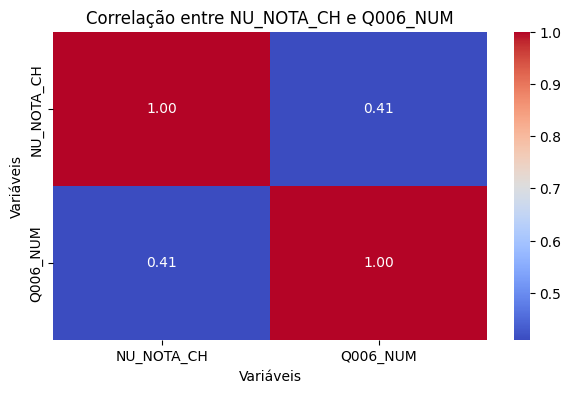

In [58]:
# Definir o tamanho da figura
plt.figure(figsize=(7, 4))
# Criar o gráfico de calor
sns.heatmap(df_feature_eng[['NU_NOTA_CH', 'Q006_NUM']].corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f')
# Adicionar título e rótulos aos eixos
plt.title('Correlação entre NU_NOTA_CH e Q006_NUM')
plt.xlabel('Variáveis')
plt.ylabel('Variáveis')
# Exibir o gráfico
plt.show()

6.5 Conversão para numérica para colunas com ordem lógica: quantidade de dias de presença de empregado doméstico

##### Q007 -> Em sua residência trabalha empregado(a) doméstico(a)?

    A	Não.
    B	Sim, um ou dois dias por semana.
    C	Sim, três ou quatro dias por semana.
    D	Sim, pelo menos cinco dias por semana.

In [59]:
for coluna in ['Q007']:
    print(df_feature_eng[coluna].value_counts(normalize=True).sort_index())

Q007
A    0.888261
B    0.061109
C    0.013972
D    0.036658
Name: proportion, dtype: float64


In [60]:
analise_media_desv_pad_notas_por_categoria_de_variavel(df_enem_filtros_limpo_formato, ['Q007'])

Analisando a variável:  Q007 

        CN_MEDIA   CN_DESVP    CH_MEDIA   CH_DESVP    LC_MEDIA   LC_DESVP    MT_MEDIA    MT_DESVP  REDACAO_MEDIA  REDACAO_DESVP
Q007                                                                                                                           
A     494.357326  76.215845  522.320705  82.962979  517.972567  72.393155  539.044058  121.575947     632.207178     215.220239
B     549.114700  89.443268  571.012899  83.180977  558.010814  72.800234  634.350930  134.656266     738.496907     188.371128
C     551.230754  94.200080  572.019101  86.678891  558.793789  75.699619  639.330095  142.843741     744.163754     195.971300
D     554.751318  93.992222  574.705616  85.874905  560.809151  75.752764  644.301457  139.968340     754.402801     192.133128
------------------------------------------------------------------------


Há uma relação crescente clara entre a frequência de trabalho doméstico e as médias das notas. Isso valida ainda mais a ideia de transformar Q007 em variável numérica ordinal.

In [61]:
dicionario_empregado = {'A': 0, # Não possui empregado doméstico
                        'B': 1, # Sim, um ou dois dias por semana
                        'C': 2, # Sim, três ou quatro dias por semana
                        'D': 3  # Sim, cinco ou mais dias por semana
                        }

df_feature_eng['Q007_NUM'] = df_feature_eng['Q007'].map(dicionario_empregado).astype(int)
df_feature_eng.drop(columns=['Q007'], inplace=True)

In [62]:
df_feature_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716570 entries, 0 to 716943
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   TP_FAIXA_ETARIA         716570 non-null  category
 1   TP_SEXO                 716570 non-null  category
 2   TP_ESTADO_CIVIL         716570 non-null  category
 3   TP_COR_RACA             716570 non-null  category
 4   TP_NACIONALIDADE        716570 non-null  category
 5   TP_ESCOLA               716570 non-null  category
 6   NU_NOTA_CN              716570 non-null  float64 
 7   NU_NOTA_CH              716570 non-null  float64 
 8   NU_NOTA_LC              716570 non-null  float64 
 9   NU_NOTA_MT              716570 non-null  float64 
 10  TP_LINGUA               716570 non-null  category
 11  NU_NOTA_REDACAO         716570 non-null  float64 
 12  Q003                    716570 non-null  category
 13  Q004                    716570 non-null  category
 14  Q005     

6.6 Analise ocupação pai e mãe

##### Ocupações do pai e da mãe Q003 e Q004

    A	Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.

    B	Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.

    C	Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.

    D	Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.

    E	Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.
    
    F	Não sei.

In [63]:
# Avaliar Ocupações do pai e da mãe Q003 e Q004
for coluna in ['Q003', 'Q004']:
    print(df_feature_eng[coluna].value_counts(normalize=True).sort_index())

Q003
A    0.137084
B    0.174984
C    0.228163
D    0.235666
E    0.103376
F    0.120728
Name: proportion, dtype: float64
Q004
A    0.107740
B    0.363494
C    0.065280
D    0.291415
E    0.077854
F    0.094217
Name: proportion, dtype: float64


In [64]:
analise_media_desv_pad_notas_por_categoria_de_variavel(df_enem_filtros_limpo_formato, ['Q003', 'Q004'])

Analisando a variável:  Q003 



        CN_MEDIA   CN_DESVP    CH_MEDIA   CH_DESVP    LC_MEDIA   LC_DESVP    MT_MEDIA    MT_DESVP  REDACAO_MEDIA  REDACAO_DESVP
Q003                                                                                                                           
A     462.300318  69.130452  483.384661  80.208439  479.362025  72.046262  483.395140  108.069731     560.605456     239.151867
B     483.147053  70.324930  512.610479  79.556114  511.042957  69.353054  519.248302  112.372340     613.493444     213.420006
C     492.129853  70.399860  521.908523  78.070217  519.330929  67.359380  535.606512  113.262898     626.648937     203.353474
D     529.079592  78.648795  558.600366  77.887702  549.091567  66.443779  600.681401  122.264172     713.673660     186.011697
E     561.389994  86.764824  583.014806  77.762306  568.403625  67.380526  653.698798  126.887517     762.711274     171.202922
F     478.714983  72.198852  504.943209  81.669708  503.399066  72.225744  510.806071  114.087056     58

Nota-se uma crescente entre as categorias A e E, porém F (Não saber) é a menor de todas.

Será mantida por trazer uma informação relevante.

#### 7. Ajustes finais e exportação

Padronizar nomes

In [65]:
# Separarar variáveis por tipo
list_enem_num = df_feature_eng.select_dtypes(include=['int64', 'float64']).columns.to_list()
list_enem_bin = df_feature_eng.select_dtypes(include=['bool']).columns.to_list()
list_enem_cat = df_feature_eng.select_dtypes(include=['category']).columns.to_list()

In [66]:
print(len(list_enem_num))
print(len(list_enem_bin))
print(len(list_enem_cat))

23
7
15


In [67]:
list_enem_num

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_REDACAO',
 'Q005',
 'QTD_Q008',
 'QTD_Q009',
 'QTD_Q010',
 'QTD_Q011',
 'QTD_Q012',
 'QTD_Q013',
 'QTD_Q014',
 'QTD_Q015',
 'QTD_Q016',
 'QTD_Q017',
 'QTD_Q019',
 'QTD_Q022',
 'QTD_Q024',
 'Q001_NUM',
 'Q002_NUM',
 'Q006_NUM',
 'Q007_NUM']

In [68]:
df_enem_renomeado = df_feature_eng.copy()

In [69]:
# Renomear colunas para padronizar
# Padrão: 'CAT_' para colunas categóricas, 'NUM_' para colunas numéricas e 'BIN_' para colunas binárias; seguido pelo nome da informação da coluna

dicionario_renomear = {'Q001_DUMMY_H': 'BIN_Q001_DUMMY_H',
                        'Q002_DUMMY_H': 'BIN_Q002_DUMMY_H',
                        'TP_FAIXA_ETARIA': 'CAT_FAIXA_ETARIA',
                        'TP_SEXO': 'CAT_SEXO',
                        'TP_ESTADO_CIVIL': 'CAT_ESTADO_CIVIL',
                        'TP_COR_RACA': 'CAT_COR_RACA',
                        'TP_NACIONALIDADE': 'CAT_NACIONALIDADE',
                        'TP_ESCOLA': 'CAT_ESCOLA',
                        'TP_LINGUA': 'CAT_LINGUA',
                        'Q003': 'CAT_Q003',
                        'Q004': 'CAT_Q004',
                        'TP_ENSINO': 'CAT_ENSINO',
                        'CO_MUNICIPIO_ESC': 'CAT_CO_MUNICIPIO_ESC',
                        'CO_UF_ESC': 'CAT_CO_UF_ESC',
                        'TP_DEPENDENCIA_ADM_ESC': 'CAT_DEPENDENCIA_ADM_ESC',
                        'TP_LOCALIZACAO_ESC': 'CAT_LOCALIZACAO_ESC',
                        'TP_SIT_FUNC_ESC': 'CAT_SIT_FUNC_ESC',
                        'NU_NOTA_CN': 'NUM_NOTA_CN',
                        'NU_NOTA_CH': 'NUM_NOTA_CH',
                        'NU_NOTA_LC': 'NUM_NOTA_LC',
                        'NU_NOTA_MT': 'NUM_NOTA_MT',
                        'NU_NOTA_REDACAO': 'NUM_NOTA_REDACAO',
                        'Q005': 'NUM_Q005',
                        'QTD_Q008': 'NUM_Q008',
                        'QTD_Q009': 'NUM_Q009',
                        'QTD_Q010': 'NUM_Q010',
                        'QTD_Q011': 'NUM_Q011',
                        'QTD_Q012': 'NUM_Q012',
                        'QTD_Q013': 'NUM_Q013',
                        'QTD_Q014': 'NUM_Q014',
                        'QTD_Q015': 'NUM_Q015',
                        'QTD_Q016': 'NUM_Q016',
                        'QTD_Q017': 'NUM_Q017',
                        'QTD_Q019': 'NUM_Q019',
                        'QTD_Q022': 'NUM_Q022',
                        'QTD_Q024': 'NUM_Q024',
                        'Q001_NUM': 'NUM_Q001',
                        'Q002_NUM': 'NUM_Q002',
                        'Q006_NUM': 'NUM_Q006',
                        'Q007_NUM': 'NUM_Q007',
                        }

# Renomear colunas de acordo com o dicionário
for old_col, new_col in dicionario_renomear.items():
    df_enem_renomeado.rename(columns={old_col: new_col}, inplace=True)

In [70]:
lista_variaveis = df_enem_renomeado.columns.to_list()

# Ordenar por nome
lista_variaveis.sort()

In [71]:
lista_variaveis

['BIN_Q001_DUMMY_H',
 'BIN_Q002_DUMMY_H',
 'BIN_Q018',
 'BIN_Q020',
 'BIN_Q021',
 'BIN_Q023',
 'BIN_Q025',
 'CAT_COR_RACA',
 'CAT_CO_MUNICIPIO_ESC',
 'CAT_CO_UF_ESC',
 'CAT_DEPENDENCIA_ADM_ESC',
 'CAT_ENSINO',
 'CAT_ESCOLA',
 'CAT_ESTADO_CIVIL',
 'CAT_FAIXA_ETARIA',
 'CAT_LINGUA',
 'CAT_LOCALIZACAO_ESC',
 'CAT_NACIONALIDADE',
 'CAT_Q003',
 'CAT_Q004',
 'CAT_SEXO',
 'CAT_SIT_FUNC_ESC',
 'NUM_NOTA_CH',
 'NUM_NOTA_CN',
 'NUM_NOTA_LC',
 'NUM_NOTA_MT',
 'NUM_NOTA_REDACAO',
 'NUM_Q001',
 'NUM_Q002',
 'NUM_Q005',
 'NUM_Q006',
 'NUM_Q007',
 'NUM_Q008',
 'NUM_Q009',
 'NUM_Q010',
 'NUM_Q011',
 'NUM_Q012',
 'NUM_Q013',
 'NUM_Q014',
 'NUM_Q015',
 'NUM_Q016',
 'NUM_Q017',
 'NUM_Q019',
 'NUM_Q022',
 'NUM_Q024']

In [72]:
# Alterar ordem do dataframe de acordo com a lista de variáveis
df_enem_renomeado = df_enem_renomeado[lista_variaveis]
df_enem_renomeado.head()

,BIN_Q001_DUMMY_H,BIN_Q002_DUMMY_H,BIN_Q018,BIN_Q020,BIN_Q021,BIN_Q023,BIN_Q025,CAT_COR_RACA,CAT_CO_MUNICIPIO_ESC,CAT_CO_UF_ESC,...,NUM_Q011,NUM_Q012,NUM_Q013,NUM_Q014,NUM_Q015,NUM_Q016,NUM_Q017,NUM_Q019,NUM_Q022,NUM_Q024
0,False,False,False,False,False,False,True,3,2304400,23,...,0,1,0,0,0,0,0,1,3,0
1,False,False,False,False,False,False,False,3,2311306,23,...,0,1,0,0,0,0,0,1,1,0
2,False,False,False,False,False,False,True,3,4128005,41,...,0,1,0,1,0,0,0,1,1,1
3,False,False,False,False,False,True,True,1,1501402,15,...,0,1,0,0,0,0,0,1,3,0
4,False,False,False,False,False,False,True,1,3550308,35,...,0,1,0,1,0,0,0,1,1,0


In [73]:
df_enem_renomeado.reset_index(drop=True, inplace=True)
df_enem_renomeado.head()

,BIN_Q001_DUMMY_H,BIN_Q002_DUMMY_H,BIN_Q018,BIN_Q020,BIN_Q021,BIN_Q023,BIN_Q025,CAT_COR_RACA,CAT_CO_MUNICIPIO_ESC,CAT_CO_UF_ESC,...,NUM_Q011,NUM_Q012,NUM_Q013,NUM_Q014,NUM_Q015,NUM_Q016,NUM_Q017,NUM_Q019,NUM_Q022,NUM_Q024
0,False,False,False,False,False,False,True,3,2304400,23,...,0,1,0,0,0,0,0,1,3,0
1,False,False,False,False,False,False,False,3,2311306,23,...,0,1,0,0,0,0,0,1,1,0
2,False,False,False,False,False,False,True,3,4128005,41,...,0,1,0,1,0,0,0,1,1,1
3,False,False,False,False,False,True,True,1,1501402,15,...,0,1,0,0,0,0,0,1,3,0
4,False,False,False,False,False,False,True,1,3550308,35,...,0,1,0,1,0,0,0,1,1,0


In [74]:
df_enem_renomeado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716570 entries, 0 to 716569
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   BIN_Q001_DUMMY_H         716570 non-null  bool    
 1   BIN_Q002_DUMMY_H         716570 non-null  bool    
 2   BIN_Q018                 716570 non-null  bool    
 3   BIN_Q020                 716570 non-null  bool    
 4   BIN_Q021                 716570 non-null  bool    
 5   BIN_Q023                 716570 non-null  bool    
 6   BIN_Q025                 716570 non-null  bool    
 7   CAT_COR_RACA             716570 non-null  category
 8   CAT_CO_MUNICIPIO_ESC     716570 non-null  category
 9   CAT_CO_UF_ESC            716570 non-null  category
 10  CAT_DEPENDENCIA_ADM_ESC  716570 non-null  category
 11  CAT_ENSINO               716570 non-null  category
 12  CAT_ESCOLA               716570 non-null  category
 13  CAT_ESTADO_CIVIL         716570 non-null  ca

In [75]:
# Salvar base tratada como pickle
df_enem_renomeado.to_pickle('Bases\MICRODADOS_ENEM_2023_tratados.pkl')